In [2]:
import pandas as pd
import numpy as np

df = pd.read_excel('datatabt_3.xlsx')
df

,meantemp,meantemp1,meantemp2,meantemp3,humidity,wind_speed
0,8.666667,7.166667,7.400000,10.000000,87.000000,4.633333
1,6.000000,8.666667,7.166667,7.400000,71.333333,1.233333
2,7.000000,6.000000,8.666667,7.166667,86.833333,3.700000
3,7.000000,7.000000,6.000000,8.666667,82.800000,1.480000
4,8.857143,7.000000,7.000000,6.000000,78.600000,6.300000
...,...,...,...,...,...,...
1455,15.238095,17.217391,16.850000,17.142857,68.043478,3.547826
1456,14.095238,15.238095,17.217391,16.850000,87.857143,6.000000
1457,14.095238,14.095238,15.238095,17.217391,89.666667,6.266667
1458,15.052632,14.095238,14.095238,15.238095,87.000000,7.325000


## Set up the dependent and independent variables

In [3]:
X = pd.DataFrame(df[['meantemp1', 'meantemp2','meantemp3', 'humidity', 'wind_speed']])
y = pd.DataFrame(df[['meantemp']])

## Independent Variables

In [4]:
X

,meantemp1,meantemp2,meantemp3,humidity,wind_speed
0,7.166667,7.400000,10.000000,87.000000,4.633333
1,8.666667,7.166667,7.400000,71.333333,1.233333
2,6.000000,8.666667,7.166667,86.833333,3.700000
3,7.000000,6.000000,8.666667,82.800000,1.480000
4,7.000000,7.000000,6.000000,78.600000,6.300000
...,...,...,...,...,...
1455,17.217391,16.850000,17.142857,68.043478,3.547826
1456,15.238095,17.217391,16.850000,87.857143,6.000000
1457,14.095238,15.238095,17.217391,89.666667,6.266667
1458,14.095238,14.095238,15.238095,87.000000,7.325000


## Dependent Variable

In [5]:
y

,meantemp
0,8.666667
1,6.000000
2,7.000000
3,7.000000
4,8.857143
...,...
1455,15.238095
1456,14.095238
1457,14.095238
1458,15.052632


## Divide data into test and train sets

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

print(X_train, X_test, y_train, y_test)

      meantemp1  meantemp2  meantemp3   humidity  wind_speed
737      11.125  10.625000  10.000000  73.125000      4.4125
923      33.375  30.875000  29.875000  52.875000     17.1375
682      18.250  18.625000  18.375000  47.625000      2.5500
1039     21.875  21.875000  22.875000  70.250000      1.8625
793      18.375  20.000000  18.750000  80.375000      4.1750
...         ...        ...        ...        ...         ...
399      18.500  17.000000  18.857143  65.375000      6.0125
993      28.625  30.250000  30.125000  61.250000     13.6750
862      28.500  29.625000  27.750000  52.125000      7.1750
1138     17.600  17.642857  17.066667  59.533333      5.9400
559      32.625  33.125000  32.375000  63.000000     10.4500

[1168 rows x 5 columns]       meantemp1  meantemp2  meantemp3   humidity  wind_speed
649   24.500000  27.625000  26.000000  67.625000    5.325000
674   23.875000  24.000000  23.000000  66.250000    1.625000
1122  20.142857  19.562500  16.857143  78.500000    1.200000

In [7]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1168, 5)
(292, 5)
(1168, 1)
(292, 1)


## Train the algorithm

In [8]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

## Control the coefficients the model chosen

In [9]:
v = pd.DataFrame(regressor.coef_,index=['Co-efficient']).transpose()
w = pd.DataFrame(X.columns, columns=['Attribute'])

In [10]:
coeff_df = pd.concat([w,v], axis=1, join='inner')
coeff_df
# y = B1.X1 + B2.X2 + B3.X3 + B4.X4
# B = COEFFICIENT
# X = INPUT (ATTRIBUTE)

,Attribute,Co-efficient
0,meantemp1,0.824065
1,meantemp2,0.080429
2,meantemp3,0.084150
3,humidity,0.007713
4,wind_speed,-0.000036


## Comparing Predicted value to the actual value

In [11]:
y_pred = regressor.predict(X_test)
y_pred = pd.DataFrame(y_pred, columns=['Predicted meantemp'])
y_pred

,Predicted meantemp
0,24.978698
1,23.909180
2,20.054329
3,35.443156
4,32.551176
...,...
287,19.960217
288,18.675579
289,34.600062
290,11.672943


In [12]:
y_test

,meantemp
649,24.500000
674,24.125000
1122,17.375000
529,36.875000
1187,32.312500
...,...
697,21.375000
309,19.857143
896,35.875000
1085,11.500000


In [13]:
date = pd.read_excel('date.xlsx')
date

,date
0,2013-01-01
1,2013-01-02
2,2013-01-03
3,2013-01-04
4,2013-01-05
...,...
287,2013-10-15
288,2013-10-16
289,2013-10-17
290,2013-10-18


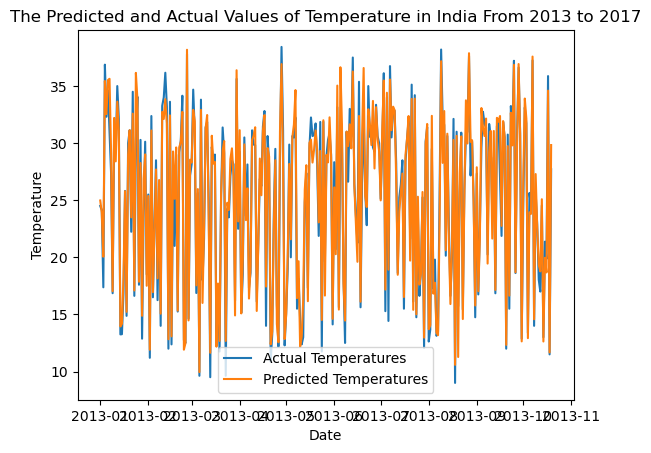

In [14]:
import matplotlib.pyplot as plt

x1 = date
x2 = date

y_show = y_test

y2 = y_pred

plt.plot(x1, y_show, label = 'Actual Temperatures')

plt.plot(x2, y2, label = 'Predicted Temperatures')

plt.legend(['Actual Temperatures', 'Predicted Temperatures'])

plt.xlabel('Date')

plt.ylabel('Temperature')

plt.title('The Predicted and Actual Values of Temperature in India From 2013 to 2017')

plt.show()

## Evaluate the algorithm

In [15]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))


Mean Absolute Error: 1.164729590765096
Mean Squared Error: 2.416828835250845
Root Mean Squared Error: 1.5546153335313675


In [16]:
from sklearn.metrics import mean_absolute_percentage_error
mean_absolute_percentage_error(y_test, y_pred)
print('%',mean_absolute_percentage_error(y_test, y_pred)*100)

% 5.166692059087025
